# Classifier metrics with paper parameters

In [3]:
from parameters import Parameters, CardSimParameters, ClassificationParameters
from banksys import Banksys
import polars as pl

params = Parameters(cardsim=CardSimParameters.paper_params(), clf_params=ClassificationParameters.paper_params(True))

#banksys = params.create_env().system
banksys = Banksys.load("cache/banksys/10000-payers/365-days/start-2023-01-01")
print(banksys.current_time)
#banksys = params.create_banksys()

2023-06-30 00:17:55


In [4]:
from datetime import timedelta

end_time = banksys.current_time + timedelta(days=30)
transactions = banksys._transactions_df.filter(pl.col("timestamp").is_between(banksys.current_time, end_time))
test_y = transactions["is_fraud"]
dfs = banksys.simulate_until(end_time)
test_x = pl.concat(dfs)
test_x.describe()

statistic,hour,is_online,amount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,card_n_trx_last_1:00:00,card_mean_amount_last_1:00:00,"card_n_trx_last_1 day, 0:00:00","card_mean_amount_last_1 day, 0:00:00","card_n_trx_last_7 days, 0:00:00","card_mean_amount_last_7 days, 0:00:00","card_n_trx_last_30 days, 0:00:00","card_mean_amount_last_30 days, 0:00:00",terminal_n_trx_last_1:00:00,terminal_risk_last_1:00:00,"terminal_n_trx_last_1 day, 0:00:00","terminal_risk_last_1 day, 0:00:00","terminal_n_trx_last_7 days, 0:00:00","terminal_risk_last_7 days, 0:00:00","terminal_n_trx_last_30 days, 0:00:00","terminal_risk_last_30 days, 0:00:00"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0,258404.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",12.203739,0.360761,21.047025,0.13352,0.133489,0.133876,0.1334,0.166631,0.165961,0.133125,0.06885,1.362728,0.90107,12.324574,6.281749,20.989818,26.905121,21.021533,0.688972,0.002268,9.023564,0.010215,63.111651,0.011359,270.482469,0.015225
"""std""",4.88317,0.480222,28.829634,0.340136,0.340103,0.340519,0.340007,0.372646,0.372046,0.33971,0.264369,8.592829,0.969871,22.390636,2.827713,15.654441,7.607156,10.89547,0.920297,0.044577,3.498676,0.038654,14.843058,0.014982,56.418615,0.008772
"""min""",0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.818571,0.0,0.0,0.0,0.0,15.0,0.0,107.0,0.0
"""25%""",8.0,0.0,6.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.12,22.0,13.250769,0.0,0.0,7.0,0.0,52.0,0.0,227.0,0.008824
"""50%""",12.0,0.0,12.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.08,6.0,16.86,26.0,18.324118,0.0,0.0,9.0,0.0,63.0,0.0,274.0,0.014409
"""75%""",18.0,1.0,24.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.02,8.0,26.08625,31.0,25.9185,1.0,0.0,11.0,0.0,74.0,0.018519,317.0,0.020588
"""max""",23.0,1.0,1044.84,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,606.31,9.0,930.12,27.0,397.46,80.0,136.021818,9.0,1.0,26.0,1.0,109.0,0.121212,400.0,0.067669


In [5]:
from sklearn.ensemble import IsolationForest
from imblearn.ensemble import BalancedRandomForestClassifier

In [6]:
classifier = banksys.clf


In [11]:
classifier.anomaly_detection_classifier = IsolationForest(n_jobs=-1,contamination=0.005)
classifier.anomaly_detection_classifier.fit(classifier.dataset['Transactions'])

classifier.ml_classifier = BalancedRandomForestClassifier(n_estimators=200, sampling_strategy=0.05, n_jobs=-1)
classifier.ml_classifier.fit(classifier.dataset['Transactions'], classifier.dataset['Labels'])



C:\Users\dalun\PycharmProjects\RL_Attack_September24\venv\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\dalun\PycharmProjects\RL_Attack_September24\venv\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\dalun\PycharmProjects\RL_Attack_September24\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is p

In [14]:
classifier.use_anomaly=False

F1 Score: 0.3680255795363709
Recall: 0.4401529636711281
Precision: 0.3162087912087912
Accuracy: 0.984702249191189
Confusion Matrix:
[[253300   2489]
 [  1464   1151]]


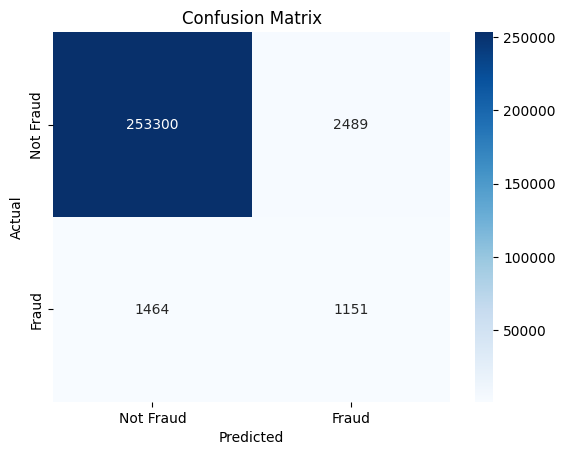

In [15]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x, true_labels=test_y, t=classifier.current_time)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
import numpy as np
from datetime import timedelta

test_duration = timedelta(days=30)

dfs = banksys.simulate_until(banksys.attack_start + test_duration)
test_x = pl.concat(dfs)
test_y = banksys.training_set["is_fraud"].to_numpy().astype(np.bool)


ValueError: cannot concat empty list

In [ ]:
test_x.describe()
len(test_y)

In [ ]:
test_x2 = test_x[-2609409:]
test_x2.describe()


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x2)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()